In [1]:
!pip install dabl
import dabl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
colorMap = sns.light_palette("blue", as_cmap=True)

     |████████████████████████████████| 566 kB 193 kB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572788 sha256=69052c7b93d3f8b5210f42ee3e3c55a10687b0e4f7b2190de5677060c4f145c9
  Stored in directory: /root/.cache/pip/wheels/aa/38/8f/66d5e159658b37cb0b8f9176a9f584f14bcd5ea0c1e96011bf
Successfully built dabl
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!wc -l ../input/riiid-test-answer-prediction/train.csv

101230333 ../input/riiid-test-answer-prediction/train.csv


In [3]:
import pandas as pd
train_data = pd.read_csv('../input/riiid-test-answer-prediction/train.csv', nrows=100000)

In [4]:
dabl.detect_types(train_data)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
row_id,False,False,False,False,False,False,True
timestamp,True,False,False,False,False,False,False
user_id,False,False,True,False,False,False,False
content_id,True,False,False,False,False,False,False
content_type_id,False,False,False,False,False,False,True
task_container_id,True,False,False,False,False,False,False
user_answer,False,False,False,True,False,False,False
answered_correctly,False,False,False,True,False,False,False
prior_question_elapsed_time,True,False,False,False,False,False,False
prior_question_had_explanation,False,False,False,True,False,False,False


In [5]:
train_data.describe().style.background_gradient(cmap=colorMap)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,97834.000000
mean,49999.500000,7332660893.202920,1090868.450650,5156.219620,0.018180,974.593070,1.382490,0.655080,24715.389854
std,28867.657797,10312300264.476053,665718.013197,3896.634400,0.133603,1205.095836,1.193602,0.512165,17379.027689
min,0.000000,0.000000,115.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,24999.750000,659592947.250000,459017.000000,1797.000000,0.000000,124.000000,0.000000,0.000000,16000.000000
50%,49999.500000,4015926714.000000,1282581.000000,4980.000000,0.000000,458.000000,1.000000,1.000000,21000.000000
75%,74999.250000,10000652877.000000,1567938.000000,7427.000000,0.000000,1358.000000,3.000000,1.000000,28666.000000
max,99999.000000,59495311427.000000,2078569.000000,32736.000000,1.000000,5630.000000,3.000000,1.000000,300000.000000


In [6]:
for col in train_data:
    print(col,len(train_data[col].unique()))

row_id 100000
timestamp 77466
user_id 349
content_id 11532
content_type_id 2
task_container_id 5631
user_answer 5
answered_correctly 3
prior_question_elapsed_time 879
prior_question_had_explanation 3


In [7]:
train_data.isnull().sum()

row_id                               0
timestamp                            0
user_id                              0
content_id                           0
content_type_id                      0
task_container_id                    0
user_answer                          0
answered_correctly                   0
prior_question_elapsed_time       2166
prior_question_had_explanation     348
dtype: int64

In [8]:
pd.set_option('display.max_columns', None)
pivot_table = pd.pivot_table(train_data, index=['user_answer']).style.background_gradient(cmap=colorMap)
pivot_table

,answered_correctly,content_id,content_type_id,prior_question_elapsed_time,row_id,task_container_id,timestamp,user_id
user_answer,,,,,,,,
-1,-1.000000,16711.834433,1,nan,49810.345435,849.118262,7264442675.090759,1093544.716722
0,0.684405,4830.169096,0,24306.646961,50239.967269,971.211889,7345856809.762184,1096701.385533
1,0.676393,4705.492224,0,24338.215567,50220.866299,975.269817,7333706398.565869,1096450.160879
2,0.702935,5879.057957,0,26447.203193,49379.744187,994.421558,7325923055.498815,1077071.573476
3,0.684930,4665.869380,0,24358.448545,49951.370666,972.797850,7326794957.578115,1088137.018046


In [9]:
pivot_table = pd.pivot_table(train_data, index=['answered_correctly']).style.background_gradient(cmap=colorMap)
pivot_table

,content_id,content_type_id,prior_question_elapsed_time,row_id,task_container_id,timestamp,user_answer,user_id
answered_correctly,,,,,,,,
-1,16711.834433,1,nan,49810.345435,849.118262,7264442675.090759,-1.000000,1093544.716722
0,5018.223814,0,24858.327260,49922.700512,786.259496,6141086314.993453,1.416872,1088168.718078
1,4907.428527,0,24649.919836,50039.805499,1064.295918,7880610361.547381,1.431067,1092033.490850


In [10]:
pivot_table = pd.pivot_table(train_data, index=['prior_question_had_explanation']).style.background_gradient(cmap=colorMap)
pivot_table

,answered_correctly,content_id,content_type_id,prior_question_elapsed_time,row_id,task_container_id,timestamp,user_answer,user_id
prior_question_had_explanation,,,,,,,,,
False,0.194668,6931.996560,0.195421,25534.327589,48329.430829,237.141997,2301140347.488337,0.996883,1064444.714823
True,0.702509,4969.731962,0.000000,24647.544621,50181.666504,1054.280247,7878986825.173582,1.423524,1093786.616288


Target looks like classification
Linear Discriminant Analysis training set score: 0.523


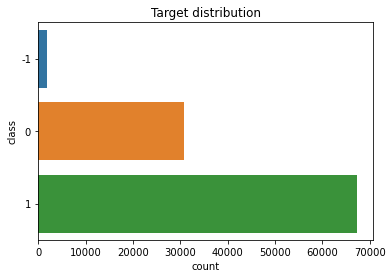

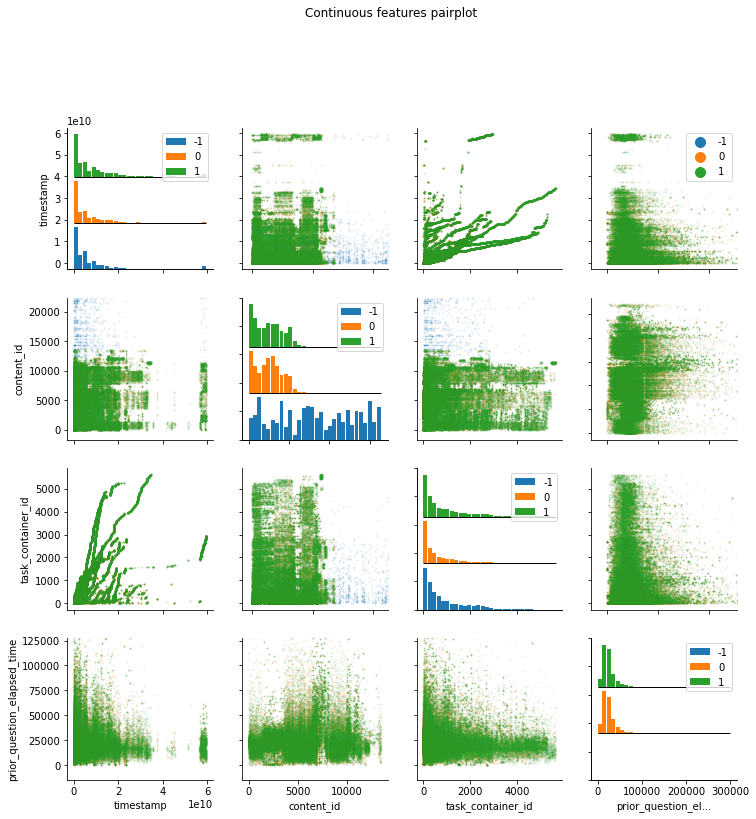

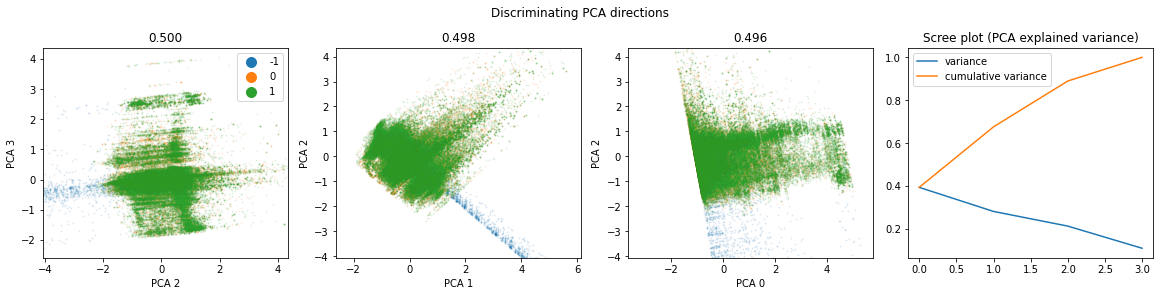

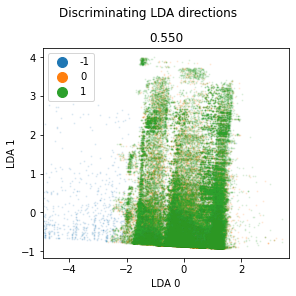

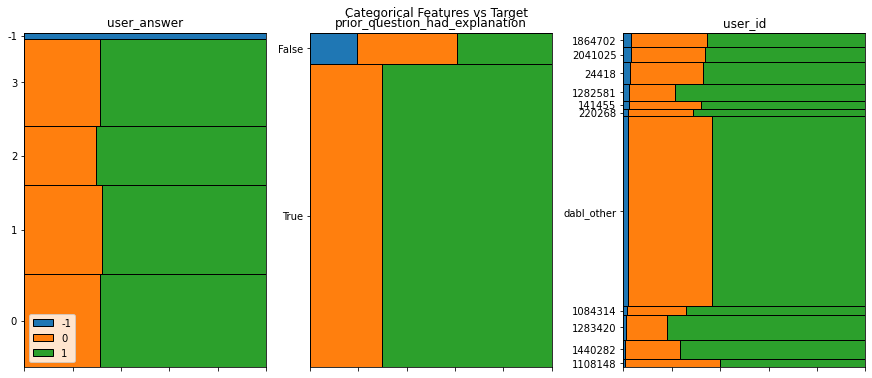

In [11]:
dabl.plot(train_data, target_col="answered_correctly")

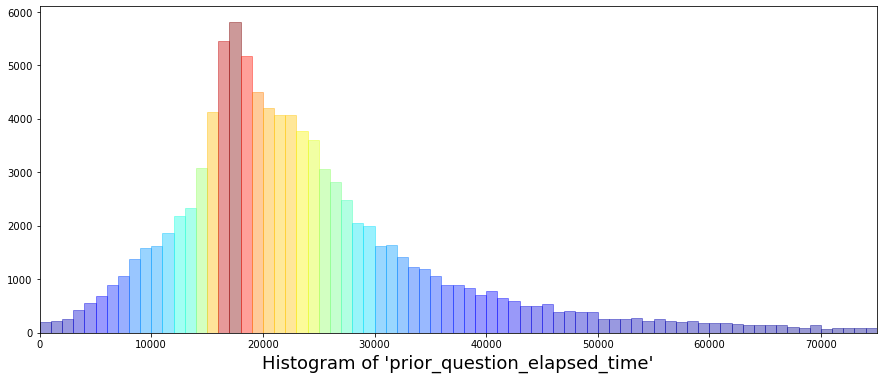

In [12]:
plt.figure(figsize = (15,6))
# set 300 bins, one bin for each of the 300 time values
ax = sns.distplot(train_data['prior_question_elapsed_time'], kde=False, bins=300)
ax.set_xlim(0,75000)
ax.set_xlabel("Histogram of 'prior_question_elapsed_time'",fontsize=18)
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.show();

In [13]:
print("The mean prior_question_elapsed_time is: %.1f" % train_data['prior_question_elapsed_time'].mean())
print("The modal value is                     :",train_data['prior_question_elapsed_time'].mode().squeeze())

The mean prior_question_elapsed_time is: 24715.4
The modal value is                     : 17000.0


In [14]:
print("Skew of prior_question_elapsed_time is:      %.2f" %train_data['prior_question_elapsed_time'].skew() )
print("Kurtosis of prior_question_elapsed_time is: %.2f" %train_data['prior_question_elapsed_time'].kurtosis() )

Skew of prior_question_elapsed_time is:      5.03
Kurtosis of prior_question_elapsed_time is: 53.78


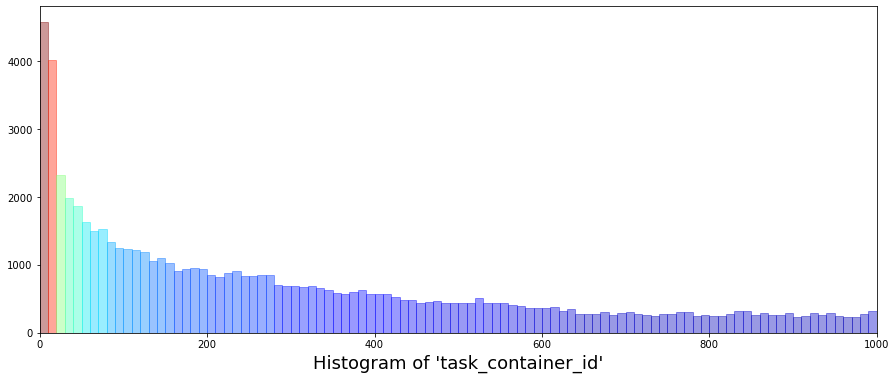

In [15]:
plt.figure(figsize = (15,6))
ax = sns.distplot(train_data['task_container_id'], kde=False, bins=563)
ax.set_xlim(0,1000)
ax.set_xlabel("Histogram of 'task_container_id'",fontsize=18)
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.show();

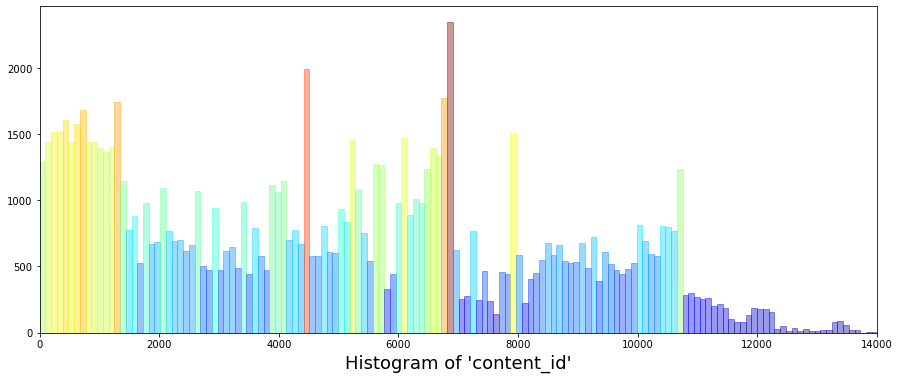

In [16]:
plt.figure(figsize = (15,6))
ax = sns.distplot(train_data['content_id'], kde=False, bins=341) # why 341? Because it is a factor of 32736 ;-)
ax.set_xlim(0,14000)
ax.set_xlabel("Histogram of 'content_id'",fontsize=18)
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.show();

In [17]:
train_data.corr().style.background_gradient(cmap='Oranges')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
row_id,1.000000,0.100032,0.984725,-0.043955,-0.000892,0.039891,-0.005664,0.002068,0.018922
timestamp,0.100032,1.000000,0.104655,0.079253,-0.000900,0.555534,-0.000443,0.070084,-0.077948
user_id,0.984725,0.104655,1.000000,-0.041602,0.000547,0.016524,-0.007040,0.002158,0.015599
content_id,-0.043955,0.079253,-0.041602,1.000000,0.403540,0.033430,-0.098140,-0.189198,0.150349
content_type_id,-0.000892,-0.000900,0.000547,0.403540,1.000000,-0.014168,-0.271616,-0.439736,nan
task_container_id,0.039891,0.555534,0.016524,0.033430,-0.014168,1.000000,0.005621,0.101546,-0.052120
user_answer,-0.005664,-0.000443,-0.007040,-0.098140,-0.271616,0.005621,1.000000,0.124352,0.011867
answered_correctly,0.002068,0.070084,0.002158,-0.189198,-0.439736,0.101546,0.124352,1.000000,-0.005566
prior_question_elapsed_time,0.018922,-0.077948,0.015599,0.150349,nan,-0.052120,0.011867,-0.005566,1.000000


In [18]:
how_good = train_data[train_data['answered_correctly'] != -1].groupby('user_id').mean()

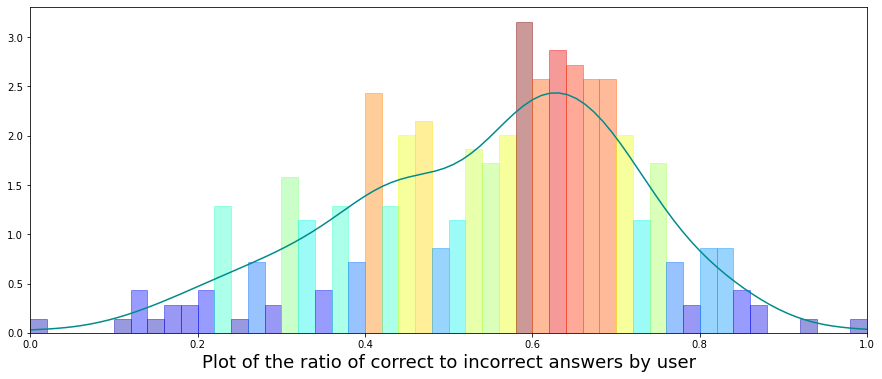

In [19]:
plt.figure(figsize = (15,6))
ax = sns.distplot(how_good['answered_correctly'], color='darkcyan',bins=50)
ax.set_xlabel("Plot of the ratio of correct to incorrect answers by user",fontsize=18)
ax.set_xlim(0,1)
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.show();

In [20]:
print("The best score is: %.1f" % (how_good['answered_correctly'].max()*100), "%")
print("The mean score is:  %.1f" % (how_good['answered_correctly'].mean()*100), "%")

The best score is: 100.0 %
The mean score is:  54.6 %


In [21]:
fig_1 = px.scatter(how_good, x=how_good['prior_question_elapsed_time'], y=how_good['answered_correctly'], 
                   trendline="ols", marginal_y="violin", marginal_x="box",
                   title=("Scatter plot of results with respect to the prior question elapsed time"))
fig_1.show()

In [22]:
X_train       = train_data.drop("answered_correctly",axis=1)
X_train       = X_train.fillna(X_train.mean())
y_train       = train_data["answered_correctly"]

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_features='auto', 
                                    min_samples_leaf=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10)

In [23]:
import eli5
from eli5.sklearn import PermutationImportance
perm_import = PermutationImportance(classifier, random_state=1).fit(X_train, y_train)
# visualize the results
eli5.show_weights(perm_import, top=None, feature_names = X_train.columns.tolist())

Weight,Feature
0.0718 ± 0.0007,content_id
0.0710 ± 0.0007,task_container_id
0.0602 ± 0.0004,row_id
0.0521 ± 0.0006,timestamp
0.0480 ± 0.0005,user_id
0.0423 ± 0.0013,user_answer
0.0301 ± 0.0006,prior_question_elapsed_time
0.0204 ± 0.0005,prior_question_had_explanation
0.0040 ± 0.0001,content_type_id
